In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Курсы

In [2]:
df = pd.read_csv('Датасет.csv')
df

,Name,Authors,Summary,Rating,Learners,Picture,Link,Category
0,"""Поколение Python"": курс для профессионалов","Тимур 🐍 Гуев, Поколение Python","Курс продолжает серию ""Поколение Python"" и рас...",5.0,13700,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/82541?search=7087465318,Языки программирования
1,"""Поколение Python"": ООП","Тимур 🐍 Гуев, Поколение Python","Курс продолжает серию ""Поколение Python"" и рас...",4.9,6800,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/98974?search=7087465319,Языки программирования
2,Асинхронность в Python. Asyncio,Александр Шибаев,Асинхронное программирование на Python в теори...,5.0,270,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/189436?search=708746...,Языки программирования
3,"""Поколение Python"": курс для начинающих","Тимур 🐍 Гуев, Поколение Python, Благотворитель...",В курсе рассказывается об основных типах данны...,5.0,1200000,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/58852?search=7087465321,Языки программирования
4,Основы SQL,Shultais Education,Курс по основам SQL на Stepik (с поддержкой). ...,5.0,5700,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/51562?search=7087465322,Языки программирования
...,...,...,...,...,...,...,...,...
464,Как создать аккаунт в TikTok и монетизировать его,Антон Евлухин,Количество интернет-пользователей увеличиваетс...,NaN,5,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/181382?search=708759...,Маркетинг и продажи
465,Битрикс24 для Агентств Недвижимости,Карпов и Партнеры,"Курс ""Битрикс24 для Агентств Недвижимости"" пом...",NaN,123,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/193375?search=708759...,Маркетинг и продажи
466,ТРЕНАЖЕР ЯРКОГО ТЕКСТА: как писать тексты для ...,NaN,Курс-тренажер нового формата – научитесь писат...,NaN,8,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/183526?search=708759...,Маркетинг и продажи
467,Технический администратор образовательных прое...,Startgram EdTech,Курс-практикум по запуску и администрированию ...,NaN,82,https://cdn.stepik.net/media/cache/images/cour...,https://stepik.org/course/97425?search=7087593772,Маркетинг и продажи


## Создаем таблицу курсов с доп. признаками

In [3]:
df_dummies = pd.get_dummies(df['Category']).astype(int) # Категориальный признак
df_items = pd.concat([df.iloc[:,:-1], df_dummies], axis=1)
df_items = df_items[['Name', 'Rating'] + df_dummies.columns.tolist()]
df_items['Rating'].fillna(0, inplace=True)
df_items = df_items.rename(
    columns={'Name': 'item_id',
             'Rating': 'rating'
        }
    )
df_items.drop_duplicates(subset=['item_id'], inplace=True)
df_items

/tmp/ipykernel_10145/365564555.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_items['Rating'].fillna(0, inplace=True)


,item_id,rating,Графический дизайн,Маркетинг и продажи,Математика,Разработка игр,Языки программирования
0,"""Поколение Python"": курс для профессионалов",5.0,0,0,0,0,1
1,"""Поколение Python"": ООП",4.9,0,0,0,0,1
2,Асинхронность в Python. Asyncio,5.0,0,0,0,0,1
3,"""Поколение Python"": курс для начинающих",5.0,0,0,0,0,1
4,Основы SQL,5.0,0,0,0,0,1
...,...,...,...,...,...,...,...
464,Как создать аккаунт в TikTok и монетизировать его,0.0,0,1,0,0,0
465,Битрикс24 для Агентств Недвижимости,0.0,0,1,0,0,0
466,ТРЕНАЖЕР ЯРКОГО ТЕКСТА: как писать тексты для ...,0.0,0,1,0,0,0
467,Технический администратор образовательных прое...,0.0,0,1,0,0,0


## EDA

In [26]:
df['Category'].nunique() # Категориалка

5

<Axes: xlabel='Category', ylabel='Count'>

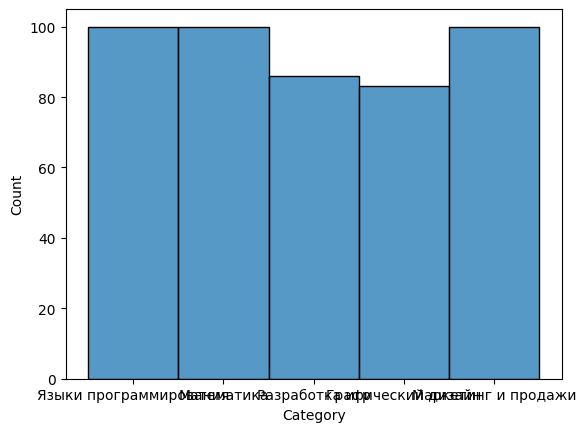

In [32]:
sns.histplot(data=df, x='Category')

# Пользователи

In [4]:
df1 = pd.read_csv('ДатасетПользователи.csv')
df1

,id,пол,возраст,предпочтение,пройденные_курсы,количество_курсов,оценка
0,1,Ж,26,Математика,"""Поколение Python"": курс для начинающих",9,9
1,1,Ж,26,Математика,"Дроби - 2в1 (Математика, 5 класс)",9,10
2,1,Ж,26,Математика,Практикум по математике и Python,9,9
3,1,Ж,26,Математика,ЕГЭ по математике 2025: первая часть,9,1
4,1,Ж,26,Математика,АА - Активный Английский от Екатерины Зак для ...,9,9
...,...,...,...,...,...,...,...
22788,2000,Ж,21,Разработка игр,НТО Junior 22. ОК «Технологии и компьютерные и...,9,8
22789,2000,Ж,21,Разработка игр,"НТО Junior 23-24. ОК ""Технологии и компьютерны...",9,10
22790,2000,Ж,21,Разработка игр,Продвинутый уровень на Python,9,1
22791,2000,Ж,21,Разработка игр,Подготовка к ОГЭ по Математике от эксперта 2025,9,10


## Создаем таблицу юзеров с доп. признаками

In [5]:
df_users = df1[['id', 'пол', 'возраст', 'предпочтение']]

In [12]:
df_dummies = pd.get_dummies(df1['предпочтение']).astype(int)
df_users = pd.concat([df1.drop(columns=['предпочтение']), df_dummies], axis=1)
df_users = df_users[['id', 'пол'] + df_dummies.columns.tolist()]
df_users['пол'] = df_users['пол'].apply(lambda x: 1 if 'М' else 0) # Мужчина НОМЕР 1
df_users = df_users.rename(
    columns={
        'id': 'user_id'
    })
df_users.drop_duplicates(subset=['user_id'], inplace=True)
df_users

,user_id,пол,Графический дизайн,Маркетинг и продажи,Математика,Разработка игр,Языки программирования
0,1,1,0,0,1,0,0
9,2,1,0,0,0,1,0
26,3,1,0,0,1,0,0
40,4,1,0,0,1,0,0
49,5,1,1,0,0,0,0
...,...,...,...,...,...,...,...
22738,1996,1,1,0,0,0,0
22747,1997,1,0,0,0,0,1
22765,1998,1,1,0,0,0,0
22773,1999,1,1,0,0,0,0


## EDA

In [30]:
df1.isna().sum()

id                   0
пол                  0
возраст              0
предпочтение         0
пройденные_курсы     0
количество_курсов    0
оценка               0
dtype: int64

<Axes: xlabel='оценка', ylabel='Count'>

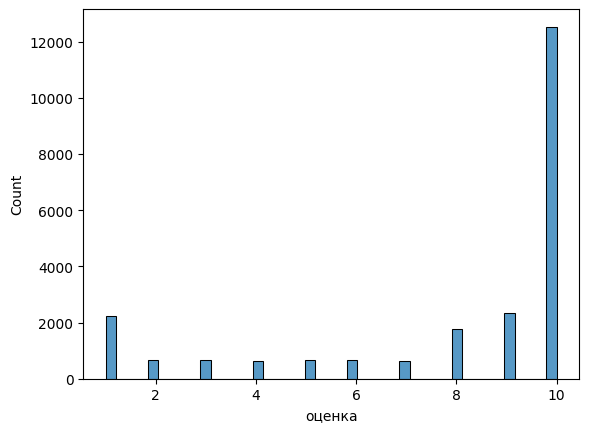

In [4]:
sns.histplot(data=df1, x='оценка')

<Axes: xlabel='количество_курсов', ylabel='Count'>

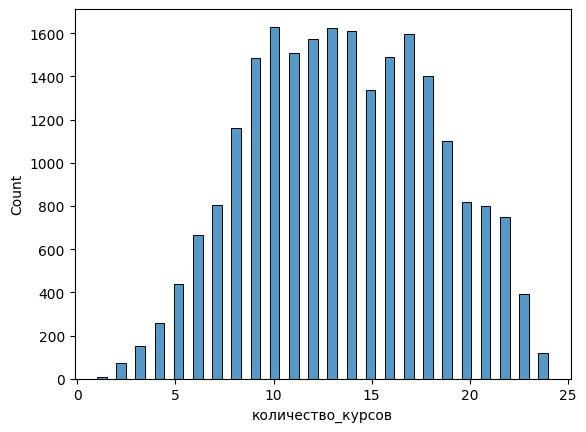

In [29]:
sns.histplot(data=df1, x='количество_курсов')

([<matplotlib.patches.Wedge at 0x7f27ba3c0470>,
 [Text(0.840120481251793, 0.7100687128590135, 'Математика'),
  Text(-0.5252221338388213, 0.9665100672656212, 'Разработка игр'),
  Text(-1.075184992816988, -0.23233000499533726, 'Маркетинг и продажи'),
  Text(-0.172504320804111, -1.086389552280356, 'Языки программирования'),
  Text(0.9235864058538217, -0.5974848541360859, 'Графический дизайн')],
 [Text(0.4582475352282506, 0.3873102070140073, '22.3%'),
  Text(-0.28648480027572065, 0.5271873094176115, '21.2%'),
  Text(-0.5864645415365389, -0.12672545727018394, '19.8%'),
  Text(-0.09409326589315144, -0.5925761194256487, '18.5%'),
  Text(0.5037744031929936, -0.3259008295287741, '18.3%')])

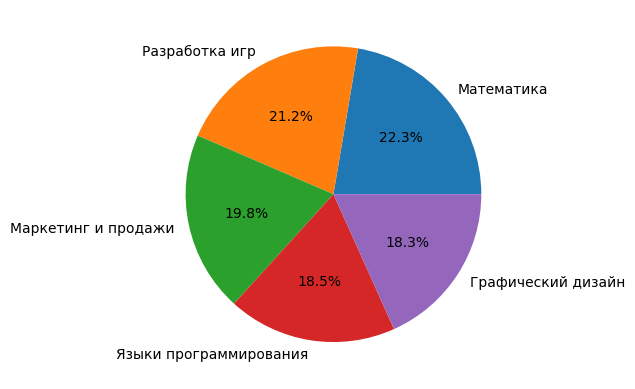

In [27]:
dct_of_preference = df1['предпочтение'].value_counts(normalize=True).to_dict()

fig, ax = plt.subplots()
ax.pie(x=dct_of_preference.values(), 
       labels=dct_of_preference.keys(),
       autopct='%1.1f%%'
       )

([<matplotlib.patches.Wedge at 0x7f27ba3cdeb0>,
 [Text(-0.0675019993078234, 1.0979269010683028, 'М'),
  Text(0.06750222617472976, -1.0979268871202017, 'Ж')],
 [Text(-0.03681927234972185, 0.5988692187645287, '52.0%'),
  Text(0.036819396095307134, -0.5988692111564735, '48.0%')])

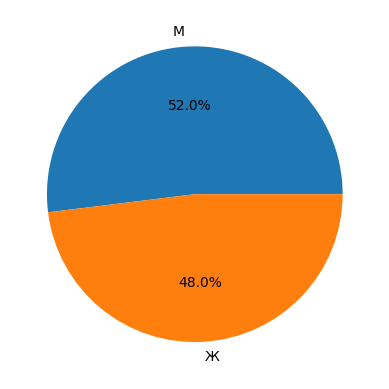

In [28]:
dct_of_preference = df1['пол'].value_counts(normalize=True).to_dict()

fig, ax = plt.subplots()
ax.pie(x=dct_of_preference.values(), 
       labels=dct_of_preference.keys(),
       autopct='%1.1f%%'
       )

# Преобразования

## Преобразование в матрицу Пользователь-Оценки курсов

In [13]:
df_iterations = df1[['id', 'пройденные_курсы', 'оценка']].dropna().rename(columns={'пройденные_курсы': 'item_id', 'id': 'user_id'})
df_iterations

,user_id,item_id,оценка
0,1,"""Поколение Python"": курс для начинающих",9
1,1,"Дроби - 2в1 (Математика, 5 класс)",10
2,1,Практикум по математике и Python,9
3,1,ЕГЭ по математике 2025: первая часть,1
4,1,АА - Активный Английский от Екатерины Зак для ...,9
...,...,...,...
22788,2000,НТО Junior 22. ОК «Технологии и компьютерные и...,8
22789,2000,"НТО Junior 23-24. ОК ""Технологии и компьютерны...",10
22790,2000,Продвинутый уровень на Python,1
22791,2000,Подготовка к ОГЭ по Математике от эксперта 2025,10


# LithFM

In [8]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd                                  # Работа с DataFrame
from lightfm import LightFM                          # Основной класс модели
from lightfm.data import Dataset                    # Класс для подготовки данных
from lightfm.evaluation import precision_at_k       # Метрика качества
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [9]:
df_items.head(3)

,item_id,rating,Графический дизайн,Маркетинг и продажи,Математика,Разработка игр,Языки программирования
0,"""Поколение Python"": курс для профессионалов",5.0,0,0,0,0,1
1,"""Поколение Python"": ООП",4.9,0,0,0,0,1
2,Асинхронность в Python. Asyncio,5.0,0,0,0,0,1


In [14]:
train_df, test_df = train_test_split(df_iterations, test_size=0.2, random_state=42)

dataset = Dataset()

users = df_iterations['user_id'].unique().tolist()
items = df_iterations['item_id'].unique().tolist()

# Формируем признаки в формате кортежей
user_features = []
for _, row in df_users.iterrows():
    # Оформление в абсолютно дебильный формат LightFM НЕНАВИЖУ ЕГО
    features = [f"пол:{row['пол']}",  
                f"Графический дизайн:{row['Графический дизайн']}",
                f"Маркетинг и продажи:{row['Маркетинг и продажи']}",
                f"Математика:{row['Математика']}",
                f"Разработка игр:{row['Разработка игр']}",
                f"Языки программирования:{row['Языки программирования']}"]
    user_features.append((row['user_id'], features))


item_features = []
for _, row in df_items.iterrows():
    # Оформление в абсолютно дебильный формат LightFM НЕНАВИЖУ ЕГО
    features = [f"rating:{row['rating']}",  
                f"Графический дизайн:{row['Графический дизайн']}",
                f"Маркетинг и продажи:{row['Маркетинг и продажи']}",
                f"Математика:{row['Математика']}",
                f"Разработка игр:{row['Разработка игр']}",
                f"Языки программирования:{row['Языки программирования']}"]
    item_features.append((row['item_id'], features))


# Обучаем датасет - НА САМОМ ДЕЛЕ КОДИРУЕМ ВСЮ ЭТУ ШНЯГУ, которая была выше
dataset.fit(users, items,
            user_features=[f for _, feats in user_features for f in feats],
            item_features=[f for _, feats in item_features for f in feats])

# Построение взаимодействий
train_interactions = list(train_df.itertuples(index=False, name=None))
test_interactions = list(test_df.itertuples(index=False, name=None))

# Создание спарс матриц 
(train_matrix, _) = dataset.build_interactions(((u, i, r) for u, i, r in train_interactions))
(test_matrix, _) = dataset.build_interactions(((u, i, r) for u, i, r in test_interactions))

# 4. Строим матрицы признаков
user_features_matrix = dataset.build_user_features(user_features)
item_features_matrix = dataset.build_item_features(item_features)

# 5. Инициализация модели LightFM
model = LightFM(loss='warp')

# 6. Обучение модели с признаками
model.fit(train_matrix, user_features=user_features_matrix, item_features=item_features_matrix, epochs=10, num_threads=1)

# 7. Оценка модели
score = precision_at_k(model, test_matrix, user_features=user_features_matrix, item_features=item_features_matrix, k=10).mean()
print(f"Средняя точность: {score:.2f}")

Средняя точность: 0.12


### Входные данные на примере нового юзера

In [99]:
df_users.head(1)

,user_id,пол,возраст,Графический дизайн,Маркетинг и продажи,Математика,Разработка игр,Языки программирования
0,1,1,26,0,0,1,0,0


In [17]:
# Новые профиль по шаблону абсолютно ДЕБИЛЬНОМУ если честно
new_profile = [f"пол:1",  
                f"Графический дизайн:1",
                f"Маркетинг и продажи:0",
                f"Математика:1",
                f"Разработка игр:1",
                f"Языки программирования:1"]


mapping = dataset.mapping()              # получаем все отображения: users, items, features и т.д.
user_feature_map = mapping[1]            # берем отображение признаков пользователей

# 12. Преобразуем строковые признаки в числовые ID
feature_ids = [user_feature_map[f] for f in new_profile]  # перевели признаки в индексы
feature_ids



data = np.ones(len(feature_ids))                       # все веса по 1.0
rows = np.zeros(len(feature_ids))                      # одна строка, значит row = 0
cols = feature_ids                                     # признаки располагаются в этих колонках
new_user_matrix = csr_matrix((data, (rows, cols)), shape=(1, user_features_matrix.shape[1]))

In [18]:
# 14. Предсказание интереса ко всем предметам для нового пользователя
n_items = item_features_matrix.shape[0]                # количество курсов
scores = model.predict(                                # получаем предсказания по dot product
    user_ids=0,                                        # т.к. new_user_matrix имеет одну строку — индекс 0
    item_ids=np.arange(n_items),
    user_features=new_user_matrix,
    item_features=item_features_matrix
)

# 15. Сортируем и выбираем топ-N рекомендаций
# np.argsort возвращает индексы по убыванию значений
recommended_indices = np.argsort(-scores)[:3]          # берём топ-3 курса
print("Рекомендации для нового пользователя:", [items[i] for i in recommended_indices])

Рекомендации для нового пользователя: ['"Поколение Python": курс для начинающих', '"Поколение Python": курс для профессионалов', 'Основы языка Java']


## Упаковка модели

In [20]:
import pickle

with open('lightfm_model.pkl', 'wb') as f:
    pickle.dump({
        'model': model,
        'dataset': dataset,
        'user_features_matrix': user_features_matrix,
        'item_features_matrix': item_features_matrix,
        'items': items
    }, f)

# Учебный LigthFM

In [113]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd                                  # Работа с DataFrame
from lightfm import LightFM                          # Основной класс модели
from lightfm.data import Dataset                    # Класс для подготовки данных
from lightfm.evaluation import precision_at_k       # Метрика качества
from sklearn.model_selection import train_test_split

# 1. Подготовка данных с оценками и признаками
# Взаимодействия содержат рейтинг (оценку)
data = pd.DataFrame({
    "user": ["user1", "user1", "user2", "user3", "user3"],
    "item": ["item1", "item2", "item3", "item1", "item3"],
    "rating": [1.0, 0.5, 1.0, 1.0, 0.2]  # Пример шкалы интереса
})

# Разделим на тренировочный и тестовый наборы
train_data, test_data = train_test_split(data, test_size=0.4, random_state=42)

# Признаки пользователей
user_features_df = pd.DataFrame({
    "user": ["user1", "user2", "user3"],
    "age_group": ["young", "middle", "young"],
    "location": ["US", "EU", "US"]
})

# Признаки предметов
item_features_df = pd.DataFrame({
    "item": ["item1", "item2", "item3"],
    "category": ["book", "movie", "book"],
    "genre": ["fiction", "comedy", "non-fiction"]
})


In [137]:
# Получаем списки пользователей и предметов
users = data["user"].unique().tolist()
items = data["item"].unique().tolist()

user_features = []

# Формируем признаки в формате списков кортежей (entity, feature)
for _, row in user_features_df.iterrows():
    features = [f"age_group:{row['age_group']}", f"location:{row['location']}"]
    user_features.append((row["user"], features))

item_features = []
for _, row in item_features_df.iterrows():
    features = [f"category:{row['category']}", f"genre:{row['genre']}"]
    item_features.append((row["item"], features))

user_features

[('user1', ['age_group:young', 'location:US']),
 ('user2', ['age_group:middle', 'location:EU']),
 ('user3', ['age_group:young', 'location:US'])]

In [138]:
[f for _, feats in user_features for f in feats]

['age_group:young',
 'location:US',
 'age_group:middle',
 'location:EU',
 'age_group:young',
 'location:US']

In [139]:
# 2. Создание Dataset с признаками
# fit теперь включает в себя и признаки пользователей и предметов
dataset = Dataset()
dataset.fit(users, items,
            user_features=[f for _, feats in user_features for f in feats],
            item_features=[f for _, feats in item_features for f in feats])



In [140]:
mapping = dataset.mapping()              # получаем все отображения: users, items, features и т.д.
user_feature_map = mapping[1]            # берем отображение признаков пользователей
user_feature_map

{'user1': 0,
 'user2': 1,
 'user3': 2,
 'age_group:young': 3,
 'location:US': 4,
 'age_group:middle': 5,
 'location:EU': 6}

In [63]:
# 3. Строим взаимодействия: отдельно train и test
train_interactions = list(train_data.itertuples(index=False, name=None))
test_interactions = list(test_data.itertuples(index=False, name=None))

test_interactions

[('user1', 'item2', 0.5), ('user3', 'item3', 0.2)]

In [ ]:
(train_matrix, _) = dataset.build_interactions(((u, i, r) for u, i, r in train_interactions))
(test_matrix, _) = dataset.build_interactions(((u, i, r) for u, i, r in test_interactions))

# 4. Строим матрицы признаков
user_features_matrix = dataset.build_user_features(user_features)
item_features_matrix = dataset.build_item_features(item_features)

# 5. Инициализация модели LightFM
model = LightFM(loss='warp')

# 6. Обучение модели с признаками
model.fit(train_matrix, user_features=user_features_matrix, item_features=item_features_matrix, epochs=10, num_threads=1)

# 7. Оценка модели
score = precision_at_k(model, test_matrix, user_features=user_features_matrix, item_features=item_features_matrix, k=2).mean()
print(f"Средняя точность: {score:.2f}")

# 8. Предсказания для пользователя
user_id = 0  # user1
n_items = train_matrix.shape[1]
scores = model.predict(user_id, np.arange(n_items), user_features=user_features_matrix, item_features=item_features_matrix)
print("Предсказанные оценки:", scores)


# 9. Рекомендуем топ-N
top_items = np.argsort(-scores)[:2]
print("Рекомендуемые предметы:", [items[i] for i in top_items])

In [47]:
# ДОБАВЛЕНО: cold-start — рекомендации для нового пользователя с признаками

# 10. Определим профиль нового пользователя
# Предположим, что он молодой пользователь из Европы
new_user_profile = ["age_group:young", "location:EU"]  # признаки уже известны модели из этапа fit

# 11. Получим словарь признаков из dataset (это mapping[3] — user feature → ID)
mapping = dataset.mapping()              # получаем все отображения: users, items, features и т.д.
user_feature_map = mapping[1]            # берем отображение признаков пользователей

In [51]:
# 12. Преобразуем строковые признаки в числовые ID
feature_ids = [user_feature_map[f] for f in new_user_profile]  # перевели признаки в индексы
feature_ids

# 13. Создаем разреженную матрицу признаков для нового пользователя (размер 1 x n_features)
# В этой матрице только одна строка — и в ней единицы на местах признаков нового пользователя
from scipy.sparse import csr_matrix

data = np.ones(len(feature_ids))                       # все веса по 1.0
rows = np.zeros(len(feature_ids))                      # одна строка, значит row = 0
cols = feature_ids                                     # признаки располагаются в этих колонках
new_user_matrix = csr_matrix((data, (rows, cols)), shape=(1, user_features_matrix.shape[1]))

In [ ]:
# 14. Предсказание интереса ко всем предметам для нового пользователя
n_items = item_features_matrix.shape[0]                # количество курсов
scores = model.predict(                                # получаем предсказания по dot product
    user_ids=0,                                        # т.к. new_user_matrix имеет одну строку — индекс 0
    item_ids=np.arange(n_items),
    user_features=new_user_matrix,
    item_features=item_features_matrix
)

# 15. Сортируем и выбираем топ-N рекомендаций
# np.argsort возвращает индексы по убыванию значений
recommended_indices = np.argsort(-scores)[:3]          # берём топ-3 курса
print("Рекомендации для нового пользователя:", [items[i] for i in recommended_indices])







Рекомендации для нового пользователя: ['item1', 'item3', 'item2']


Средняя точность: 0.25


Предсказанные оценки: [-0.05796642 -0.26290572 -0.13226777]


Рекомендуемые предметы: ['item1', 'item3']


In [23]:
# Новый пользователь, которого не было в обучении
new_user_id = "user_new"
new_user_feats = [(new_user_id, ["age_group:young", "location:EU"])]

# 1. Строим user_features только для него
new_user_matrix = dataset.build_user_features(new_user_feats)

ValueError: user id user_new not in user id mappings.

# RecTools

url: https://habr.com/ru/articles/773126/

## Подготовка данных к моделям

In [9]:
df_users

,id,пол,возраст,Графический дизайн,Маркетинг и продажи,Математика,Разработка игр,Языки программирования
0,1,1,26,0,0,1,0,0
1,1,1,26,0,0,1,0,0
2,1,1,26,0,0,1,0,0
3,1,1,26,0,0,1,0,0
4,1,1,26,0,0,1,0,0
...,...,...,...,...,...,...,...,...
22788,2000,1,21,0,0,0,1,0
22789,2000,1,21,0,0,0,1,0
22790,2000,1,21,0,0,0,1,0
22791,2000,1,21,0,0,0,1,0


In [46]:
df_items.head(3)

,Name,Rating,Графический дизайн,Маркетинг и продажи,Математика,Разработка игр,Языки программирования
0,"""Поколение Python"": курс для профессионалов",5.0,0,0,0,0,1
1,"""Поколение Python"": ООП",4.9,0,0,0,0,1
2,Асинхронность в Python. Asyncio,5.0,0,0,0,0,1


In [11]:
# Подготовка данных - преобразование в формат для моделей\
from datetime import datetime    
from rectools.dataset import Dataset
from sklearn.model_selection import train_test_split

# Вносим изменения в таблицу взаимодействий. Наименвоания столбцов строгие!!
df_iterations = df_iterations.rename(
    columns={
        'id': 'user_id',
        'пройденные_курсы': 'item_id',
        'оценка': 'weight'
        }
    )
df_iterations['datetime'] = datetime(2025, 1, 1) # Без времени не работает казлина

# train_df, test_df = train_test_split(
#     df_iterations,
#     test_size=0.2,
#     random_state=42,
#     shuffle=True
# )

# Таблица признаков юзера
df_users = df_users.rename(
            columns={
                'id': 'user_id'
            } 
        ).drop_duplicates(subset='user_id')

# Таблица признаков курсов
df_items = df_items.rename(
    columns={
        'Name': 'item_id'
    }
).drop_duplicates(subset='item_id')

dataset_train = Dataset.construct(
    interactions_df=df_iterations,
    user_features_df=df_users,
    item_features_df=df_items,
    make_dense_user_features=True,
    make_dense_item_features=True
)

# dataset_test = Dataset.construct(
#     interactions_df=test_df,
#     user_features_df=df_users,
#     item_features_df=df_items,
#     make_dense_user_features=True,
#     make_dense_item_features=True
# )




In [85]:
df_iterations

,user_id,item_id,weight,datetime
0,1,"""Поколение Python"": курс для начинающих",9,2025-01-01
1,1,"Дроби - 2в1 (Математика, 5 класс)",10,2025-01-01
2,1,Практикум по математике и Python,9,2025-01-01
3,1,ЕГЭ по математике 2025: первая часть,1,2025-01-01
4,1,АА - Активный Английский от Екатерины Зак для ...,9,2025-01-01
...,...,...,...,...
22788,2000,НТО Junior 22. ОК «Технологии и компьютерные и...,8,2025-01-01
22789,2000,"НТО Junior 23-24. ОК ""Технологии и компьютерны...",10,2025-01-01
22790,2000,Продвинутый уровень на Python,1,2025-01-01
22791,2000,Подготовка к ОГЭ по Математике от эксперта 2025,10,2025-01-01


In [87]:
train_df[train_df['user_id'] == 715]

,user_id,item_id,weight,datetime
8195,715,Цифровая обработка изображений в редакторе Pho...,10,2025-01-01
8196,715,Курс по Adobe Photoshop - с нуля до результата!,1,2025-01-01
8203,715,"Рациональные числа (Математика, 6 класс)",7,2025-01-01
8204,715,"НТО Junior 23-24. ОК ""Технологии и компьютерны...",10,2025-01-01
8201,715,Учебник по UI-дизайну,1,2025-01-01
8199,715,Основы работы с чатом GPT и Midjourney,10,2025-01-01
8202,715,Инструменты дизайнера Photoshop и Illustrator....,10,2025-01-01


In [88]:
test_df[test_df['user_id'] == 715]

,user_id,item_id,weight,datetime
8197,715,Введение в дизайн,7,2025-01-01
8200,715,Основы дизайна интерфейсов,9,2025-01-01
8198,715,Дизайн инфографики и визуализации данных,7,2025-01-01


### Popular Model

In [36]:
from rectools.models import PopularModel


model = PopularModel()
model.fit(dataset_train)

recos = model.recommend(
    users=dataset_train.interactions.df['user_id'].unique(),
    dataset=dataset_train,
    k=10,
    filter_viewed=True,
)

In [37]:
recos

,user_id,item_id,score,rank
0,1,"""Поколение Python"": курс для профессионалов",387.0,1
1,1,1С: Управление торговлей,372.0,2
2,1,Введение в Unity,360.0,3
3,1,Создание игр на Unreal Engine,340.0,4
4,1,Основы дизайна интерфейсов,306.0,5
...,...,...,...,...
19995,0,Введение в Unity,360.0,6
19996,0,Создание игр на Unreal Engine,340.0,7
19997,0,ЕГЭ по математике 2025: уравнения,314.0,8
19998,0,АА - Активный Английский от Екатерины Зак для ...,310.0,9


In [39]:
from rectools.metrics import MAP
MAP(k=10).calc_per_user(recos, df_iterations[['user_id', 'item_id']]).values.mean()

0.0

### SVD

In [12]:
from rectools.models import PureSVDModel

# Fit model and generate recommendations for all users
model = PureSVDModel()
model.fit(dataset_train)

recos = model.recommend(
    users=dataset_train.interactions.df['user_id'].unique(),
    dataset=dataset_train,
    k=10,
    filter_viewed=True,
)

ValueError: 
                Model `<class 'rectools.models.pure_svd.PureSVDModel'>` doesn't support recommendations for cold users,
                but some of given users are cold: they are not in the `dataset.user_id_map`
            

In [121]:
MAP(k=10).calc_per_user(recos, test_df[['user_id', 'item_id']]).values.mean()

0.26318947802777864

### ALS

In [32]:
from rectools.models import ImplicitALSWrapperModel
from implicit.als import AlternatingLeastSquares

als_score = AlternatingLeastSquares(
            factors=64,
            regularization=0.01,
            alpha=1,
            random_state=2023,
            use_gpu=False,
            iterations=15)

model = ImplicitALSWrapperModel(als_score)
model.fit(dataset_train)

recos = model.recommend(
    users=dataset_train.interactions.df['user_id'].unique(),
    dataset=dataset_train,
    k=10,
    filter_viewed=True,
)

/home/aleksandr/.pyenv/versions/rec_System/lib/python3.11/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 12 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

ValueError: 
                Model `<class 'rectools.models.implicit_als.ImplicitALSWrapperModel'>` doesn't support recommendations for warm and cold users,
                but some of given users are warm: they are not in the interactions
            

In [123]:
MAP(k=10).calc_per_user(recos, test_df[['user_id', 'item_id']]).values.mean()

0.16542636310958048

### Implicit KNN

In [69]:
from rectools.models import ImplicitItemKNNWrapperModel
from implicit.nearest_neighbours import TFIDFRecommender

model = ImplicitItemKNNWrapperModel(
        model=TFIDFRecommender(K=10)
        )
model.fit(dataset_train)
recos = model.recommend(
    users=dataset_test.interactions.df['user_id'].unique(),
    dataset=dataset_train,
    k=10,
    filter_viewed=True,
)

ValueError: 
                Model `<class 'rectools.models.implicit_knn.ImplicitItemKNNWrapperModel'>` doesn't support recommendations for warm and cold users,
                but some of given users are warm: they are not in the interactions
            

In [127]:
MAP(k=10).calc_per_user(recos, test_df[['user_id', 'item_id']]).values.mean()

0.31053149585342743

### LightFM

In [101]:
from rectools.models import LightFMWrapperModel
from lightfm import LightFM

model = LightFMWrapperModel(
        # внутри модели указываем параметр no_components
        # это размезность эмбеддингов, которые выучит модель
        model=LightFM(
            no_components = 64,
            loss='warp',
            random_state=42
            )
        )

model.fit(dataset_train, epochs=10)
recos = model.recommend(
    users=dataset_test.interactions.df['user_id'].unique(),
    dataset=dataset_train,
    k=10,
    filter_viewed=True,
)

TypeError: LightFMWrapperModel._fit() got an unexpected keyword argument 'epochs'

In [99]:
MAP(k=10).calc_per_user(recos, test_df[['user_id', 'item_id']]).values.mean()

0.007479841796071452

### DSSM - НУЖНЫ ФИЧИ

In [34]:
from rectools.models import DSSMModel


model = DSSMModel(dataset_train, 
                  max_epochs = 10,
                  batch_size = 64
                 )

model.fit(dataset_train)
recos = model.recommend(
    users=dataset_test.interactions.df['user_id'].unique(),
    dataset=dataset_train,
    k=10,
    filter_viewed=True,
)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/aleksandr/.pyenv/versions/rec_System/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


AttributeError: 'Dataset' object has no attribute 'from_dataset'

In [11]:
from rectools.models.nn.transformers import BERT4RecModel, SASRecModel

ImportError: cannot import name 'BERT4RecModel' from 'rectools.models.nn.transformers' (/home/aleksandr/.pyenv/versions/rec_System/lib/python3.11/site-packages/rectools/models/nn/transformers/__init__.py)

In [26]:
from rectools.models.nn.transformers.bert4rec import BERT4RecModelConfig
from rectools.models import BERT4RecModel, SASRecModel




# config = BERT4RecModelConfig(
#     history_len=50,
#     max_epochs=5,
#     batch_size=256,
#     n_layers=2,
#     n_heads=2,
#     d_model=64,
#     dropout=0.1,
#     lr=1e-3,
#     verbose=True
# )

model = BERT4RecModel()
# Обучение модели
model.fit(dataset_train)

# Генерация рекомендаций
recommendations = model.recommend(
    users=dataset_test.interactions.df['user_id'].unique(),
    dataset=dataset_train,
    k=10,
    filter_viewed=True
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/aleksandr/.pyenv/versions/rec_System/lib/python3.11/site-packages/rectools/dataset/identifiers.py:60: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unq_values = pd.unique(values)
/home/aleksandr/.pyenv/versions/rec_System/lib/python3.11/site-packages/rectools/models/nn/item_net.py:141: UserWarning: 
            Ignoring `CatFeaturesItemNet` block because dataset item features are dense and
            one-hot-encoded categorical features were not created when constructing dataset.
            
  warnings.warn(explanation)
/home/aleksandr/.pyenv/versions/rec_System/lib/python3.11/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `str` - serialized value may not be as expected [input_value

ValueError: 
                Model `<class 'rectools.models.nn.transformers.bert4rec.BERT4RecModel'>` doesn't support recommendations for cold users,
                but some of given users are cold: they are not in the `dataset.user_id_map`
            